# Receive and Decode Amplitude Modulation

## Ethernet Amplitude Receiver

Starting Ethernet packet capture...
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 10 bytes
Received Eth packet size: 12 bytes
Received Eth packet size: 12 bytes
Received Eth packet

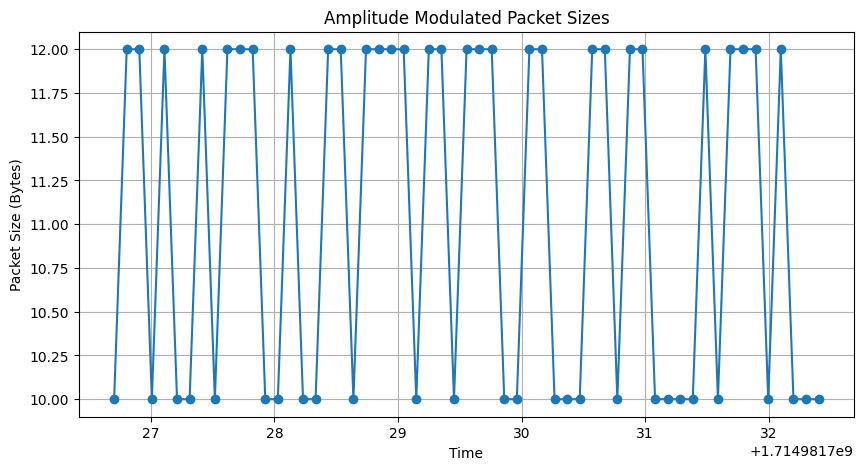

Decoded binary data: 011010010111001001101111011011100110001101100001011101000
Tranlated to ASCII: {'ironcat'}


In [8]:
from scapy.all import sniff, Ether
import matplotlib.pyplot as plt
import numpy as np

# Initialize global lists to store packet sizes and timestamps
packet_sizes = []
timestamps = []
def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text
def handle_packet(packet):
    """ Handle each packet, extract size, and store it with a timestamp. """
    expected_mac = "c4:03:a8:d1:a6:81"
    if packet[Ether].src == expected_mac:
        size = len(packet[Ether].payload)
        packet_sizes.append(size)
        timestamps.append(packet.time)
        print(f"Received Eth packet size: {size} bytes")

def plot_and_decode_packet_sizes(packet_sizes, timestamps):
    """ Plot packet sizes and decode them into binary data based on size thresholds. """
    # Define thresholds (assuming 100 bytes for '0' and 500 bytes for '1')
    threshold = (10 + 12) / 2
    binary_data = ''.join(['0' if size < threshold else '1' for size in packet_sizes])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, packet_sizes, 'o-')
    plt.title('Amplitude Modulated Packet Sizes')
    plt.xlabel('Time')
    plt.ylabel('Packet Size (Bytes)')
    plt.grid(True)
    plt.show()

    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})

def main():
    # Start packet sniffing
    print("Starting Ethernet packet capture...")
    
    sniff(prn=handle_packet, lfilter=lambda x: x.haslayer(Ether), store=False, timeout=10)  # Adjust timeout as necessary


    # After capture, process and plot
    if packet_sizes:
        plot_and_decode_packet_sizes(packet_sizes, timestamps)

if __name__ == "__main__":
    main()

## IP Amplitude Receiver

Starting IP packet capture...
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 12 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 12 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes
Received IP packet size: 10 bytes


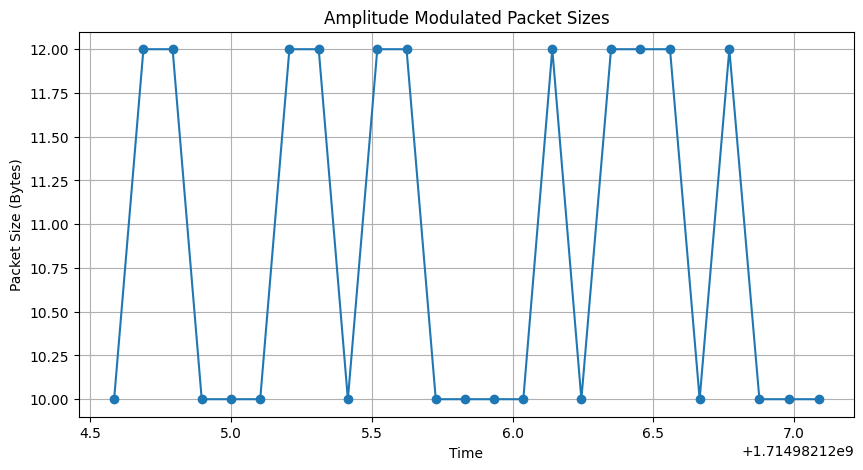

Decoded binary data: 0110001101100001011101000
Tranlated to ASCII: {'cat'}


In [3]:
from scapy.all import sniff, Ether, IP
import matplotlib.pyplot as plt
import numpy as np

# Initialize global lists to store packet sizes and timestamps
packet_sizes = []
timestamps = []
def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text
def handle_packet(packet):
    """ Handle each packet, extract size, and store it with a timestamp. """
    
    if packet[IP].src == expected_src_ip:
        size = len(packet[IP].payload)
        packet_sizes.append(size)
        timestamps.append(packet.time)
        print(f"Received IP packet size: {size} bytes")

def plot_and_decode_packet_sizes(packet_sizes, timestamps):
    """ Plot packet sizes and decode them into binary data based on size thresholds. """
    # Define thresholds (assuming 100 bytes for '0' and 500 bytes for '1')
    threshold = (10 + 12) / 2
    binary_data = ''.join(['0' if size < threshold else '1' for size in packet_sizes])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, packet_sizes, 'o-')
    plt.title('Amplitude Modulated Packet Sizes')
    plt.xlabel('Time')
    plt.ylabel('Packet Size (Bytes)')
    plt.grid(True)
    plt.show()

    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})

def main():
    # Start packet sniffing
    mac_adapter="c4:03:a8:d1:a6:82"
    ip_wifi="172.20.7.186"
    global expected_src_ip
    expected_src_ip = ip_wifi  # Adjust as necessary

    # Start packet sniffing
    print("Starting IP packet capture...")
    
    
    
    #conf.iface="Loopback Pseudo-Interface 1"
    sniff(filter="not tcp and not udp", iface="Wi-Fi", prn=handle_packet, store=False, timeout=10)  # Adjust timeout as needed


    # After capture, process and plot
    if packet_sizes:
        plot_and_decode_packet_sizes(packet_sizes, timestamps)

if __name__ == "__main__":
    main()

## ICMP Amplitude Recieve

Starting ICMP packet capture...
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 2 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes
Received ICMP packet size: 1 bytes


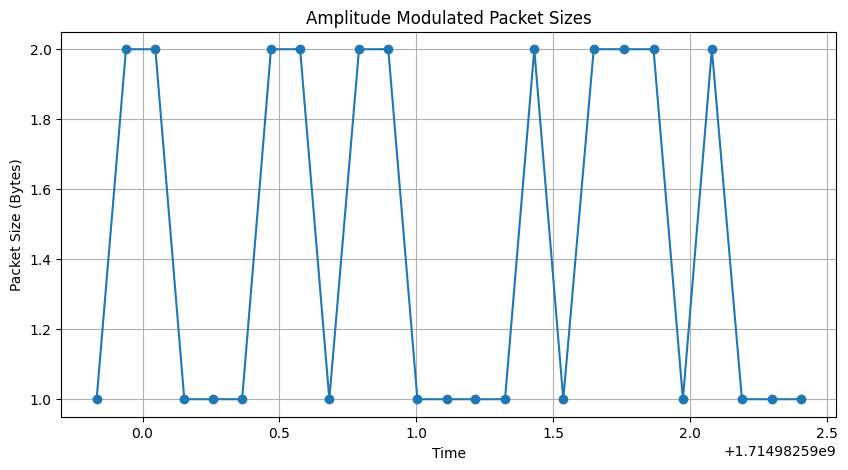

Decoded binary data: 0110001101100001011101000
Tranlated to ASCII: {'cat'}


In [12]:
from scapy.all import sniff, Ether, IP, ICMP
import matplotlib.pyplot as plt
import numpy as np

# Initialize global lists to store packet sizes and timestamps
packet_sizes = []
timestamps = []
def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text
def handle_packet(packet):
    """ Handle each packet, extract size, and store it with a timestamp. """
    
    if packet.haslayer(ICMP) and packet[IP].src == expected_src_ip:
        size = len(packet[ICMP].payload)
        packet_sizes.append(size)
        timestamps.append(packet.time)
        print(f"Received ICMP packet size: {size} bytes")

def plot_and_decode_packet_sizes(packet_sizes, timestamps):
    """ Plot packet sizes and decode them into binary data based on size thresholds. """
    # Define thresholds (assuming 100 bytes for '0' and 500 bytes for '1')
    threshold = (1 + 2 ) / 2
    binary_data = ''.join(['0' if size < threshold else '1' for size in packet_sizes])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, packet_sizes, 'o-')
    plt.title('Amplitude Modulated Packet Sizes')
    plt.xlabel('Time')
    plt.ylabel('Packet Size (Bytes)')
    plt.grid(True)
    plt.show()

    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})

def main():
    # Start packet sniffing
    mac_adapter="c4:03:a8:d1:a6:82"
    ip_wifi="172.20.7.186"
    global expected_src_ip
    expected_src_ip = ip_wifi  # Adjust as necessary

    # Start packet sniffing
    print("Starting ICMP packet capture...")
    
    #conf.iface="Loopback Pseudo-Interface 1"
    sniff(filter="icmp", iface="Wi-Fi", prn=handle_packet, store=False, timeout=10)  # Adjust timeout as needed


    # After capture, process and plot
    if packet_sizes:
        plot_and_decode_packet_sizes(packet_sizes, timestamps)

if __name__ == "__main__":
    main()

## UDP Amplitude Receiver 

Starting UDP packet capture...
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 100 bytes


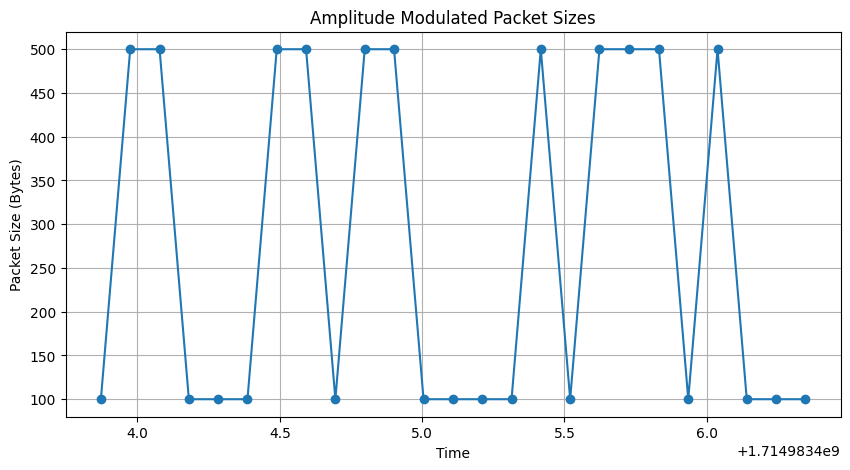

Decoded binary data: 0110001101100001011101000
Decoded binary data: 0110001101100001011101000
Tranlated to ASCII: {'cat'}


In [2]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np


def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

# Initialize global lists to store packet sizes and timestamps
packet_sizes = []
timestamps = []

def handle_packet(packet):
    """ Handle each packet, extract size, and store it with a timestamp. """
    if packet.haslayer(UDP):
        size = len(packet[UDP].payload)
        packet_sizes.append(size)
        timestamps.append(packet.time)
        print(f"Received UDP packet size: {size} bytes")
        

def plot_and_decode_packet_sizes(packet_sizes, timestamps):
    """ Plot packet sizes and decode them into binary data based on size thresholds. """
    # Define thresholds (assuming 100 bytes for '0' and 500 bytes for '1')
    threshold = (100 + 500) / 2
    binary_data = ''.join(['0' if size < threshold else '1' for size in packet_sizes])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, packet_sizes, 'o-')
    plt.title('Amplitude Modulated Packet Sizes')
    plt.xlabel('Time')
    plt.ylabel('Packet Size (Bytes)')
    plt.grid(True)
    plt.show()

    print(f"Decoded binary data: {binary_data}")
    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})

def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    target_port = 443
    sniff(filter=f"udp port {target_port}", prn=handle_packet, store=False, timeout=10)  # Adjust timeout as necessary

    # After capture, process and plot
    if packet_sizes:
        plot_and_decode_packet_sizes(packet_sizes, timestamps)

if __name__ == "__main__":
    main()
